In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [28]:
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4865, 0.4409), (0.2673, 0.2564, 0.2761))
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4865, 0.4409), (0.2673, 0.2564, 0.2761))
])

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.CIFAR100('/files/', train=True, download=True,
                                  transform=train_transform),
    batch_size=1024,num_workers=4, pin_memory=True, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.CIFAR100('/files/', train=False,download=True,
                                  transform=test_transform),
    batch_size=512,num_workers=4, pin_memory=True, shuffle=False)

In [29]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'densenet121', weights="DEFAULT")

num_classes = 100
in_features = model.classifier.in_features
model.classifier = nn.Linear(in_features, num_classes)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


In [30]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0003)

In [31]:
from tqdm import tqdm

def train(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    progress = tqdm(loader, desc="Training", leave=False)
    for images, labels in progress:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

        progress.set_postfix(loss=loss.item())

    accuracy = 100 * correct / total
    return running_loss / len(loader), accuracy


def test(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct, total = 0, 0

    progress = tqdm(loader, desc="Testing", leave=False)
    with torch.no_grad():
        for images, labels in progress:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            progress.set_postfix(loss=loss.item())

    accuracy = 100 * correct / total
    return running_loss / len(loader), accuracy


In [32]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

num_epochs = 30

for epoch in range(num_epochs):
    train_loss, train_accuracy = train(model, train_loader, criterion, optimizer, device)
    test_loss, test_accuracy = test(model, test_loader, criterion, device)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
          f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

Epoch 1/30, Train Loss: 3.6084, Train Accuracy: 20.43%, Test Loss: 2.5822, Test Accuracy: 36.89%


Epoch 2/30, Train Loss: 2.1085, Train Accuracy: 45.62%, Test Loss: 1.8368, Test Accuracy: 49.81%


Epoch 3/30, Train Loss: 1.5962, Train Accuracy: 56.37%, Test Loss: 1.5869, Test Accuracy: 56.34%


Epoch 4/30, Train Loss: 1.2971, Train Accuracy: 63.71%, Test Loss: 1.4716, Test Accuracy: 59.41%


Epoch 5/30, Train Loss: 1.0761, Train Accuracy: 69.39%, Test Loss: 1.4451, Test Accuracy: 60.37%


Epoch 6/30, Train Loss: 0.9023, Train Accuracy: 74.25%, Test Loss: 1.4155, Test Accuracy: 61.36%


Epoch 7/30, Train Loss: 0.7412, Train Accuracy: 78.74%, Test Loss: 1.4080, Test Accuracy: 61.73%


Epoch 8/30, Train Loss: 0.6102, Train Accuracy: 82.42%, Test Loss: 1.4204, Test Accuracy: 62.36%


Epoch 9/30, Train Loss: 0.5064, Train Accuracy: 85.58%, Test Loss: 1.4289, Test Accuracy: 62.77%


Epoch 10/30, Train Loss: 0.4021, Train Accuracy: 88.73%, Test Loss: 1.4598, Test Accuracy: 63.17%


Epoch 11/30, Train Loss: 0.3273, Train Accuracy: 91.00%, Test Loss: 1.4876, Test Accuracy: 62.67%


Epoch 12/30, Train Loss: 0.2657, Train Accuracy: 92.66%, Test Loss: 1.5035, Test Accuracy: 63.34%


Epoch 13/30, Train Loss: 0.2140, Train Accuracy: 94.18%, Test Loss: 1.5385, Test Accuracy: 63.07%


Epoch 14/30, Train Loss: 0.1838, Train Accuracy: 95.15%, Test Loss: 1.5769, Test Accuracy: 63.36%


Epoch 15/30, Train Loss: 0.1530, Train Accuracy: 95.95%, Test Loss: 1.6143, Test Accuracy: 63.04%


Epoch 16/30, Train Loss: 0.1312, Train Accuracy: 96.58%, Test Loss: 1.6336, Test Accuracy: 62.99%


Epoch 17/30, Train Loss: 0.1141, Train Accuracy: 97.05%, Test Loss: 1.6479, Test Accuracy: 63.51%


Epoch 18/30, Train Loss: 0.1028, Train Accuracy: 97.32%, Test Loss: 1.6948, Test Accuracy: 62.65%


Epoch 19/30, Train Loss: 0.0915, Train Accuracy: 97.61%, Test Loss: 1.7187, Test Accuracy: 63.17%


Epoch 20/30, Train Loss: 0.0820, Train Accuracy: 97.86%, Test Loss: 1.7281, Test Accuracy: 63.63%


Epoch 21/30, Train Loss: 0.0829, Train Accuracy: 97.77%, Test Loss: 1.7751, Test Accuracy: 62.77%


Epoch 22/30, Train Loss: 0.0770, Train Accuracy: 97.97%, Test Loss: 1.7973, Test Accuracy: 62.82%


Epoch 23/30, Train Loss: 0.0723, Train Accuracy: 98.09%, Test Loss: 1.7989, Test Accuracy: 62.92%


Epoch 24/30, Train Loss: 0.0617, Train Accuracy: 98.43%, Test Loss: 1.8061, Test Accuracy: 63.06%


Epoch 25/30, Train Loss: 0.0604, Train Accuracy: 98.43%, Test Loss: 1.8516, Test Accuracy: 63.17%


Epoch 26/30, Train Loss: 0.0562, Train Accuracy: 98.58%, Test Loss: 1.8436, Test Accuracy: 63.57%


Epoch 27/30, Train Loss: 0.0518, Train Accuracy: 98.65%, Test Loss: 1.8388, Test Accuracy: 63.70%


Epoch 28/30, Train Loss: 0.0533, Train Accuracy: 98.58%, Test Loss: 1.8709, Test Accuracy: 63.30%


Epoch 29/30, Train Loss: 0.0490, Train Accuracy: 98.71%, Test Loss: 1.9136, Test Accuracy: 62.77%


Epoch 30/30, Train Loss: 0.0538, Train Accuracy: 98.48%, Test Loss: 1.9407, Test Accuracy: 62.68%


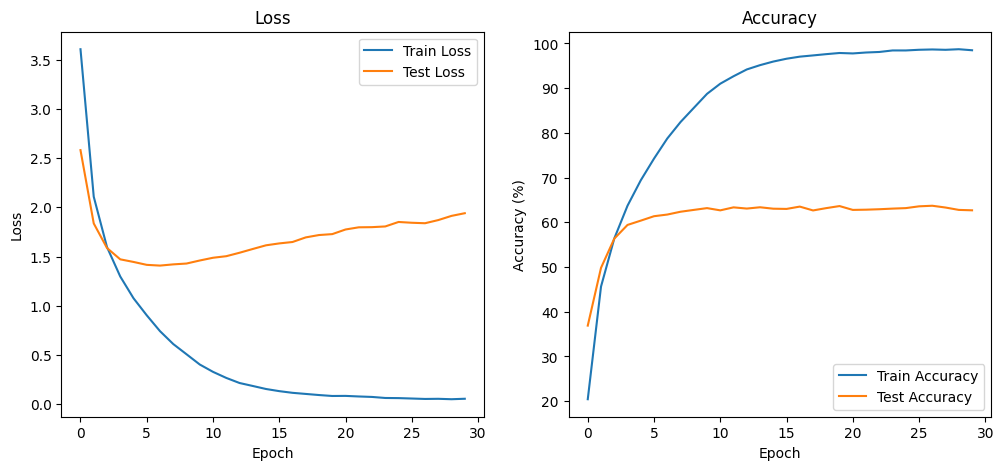

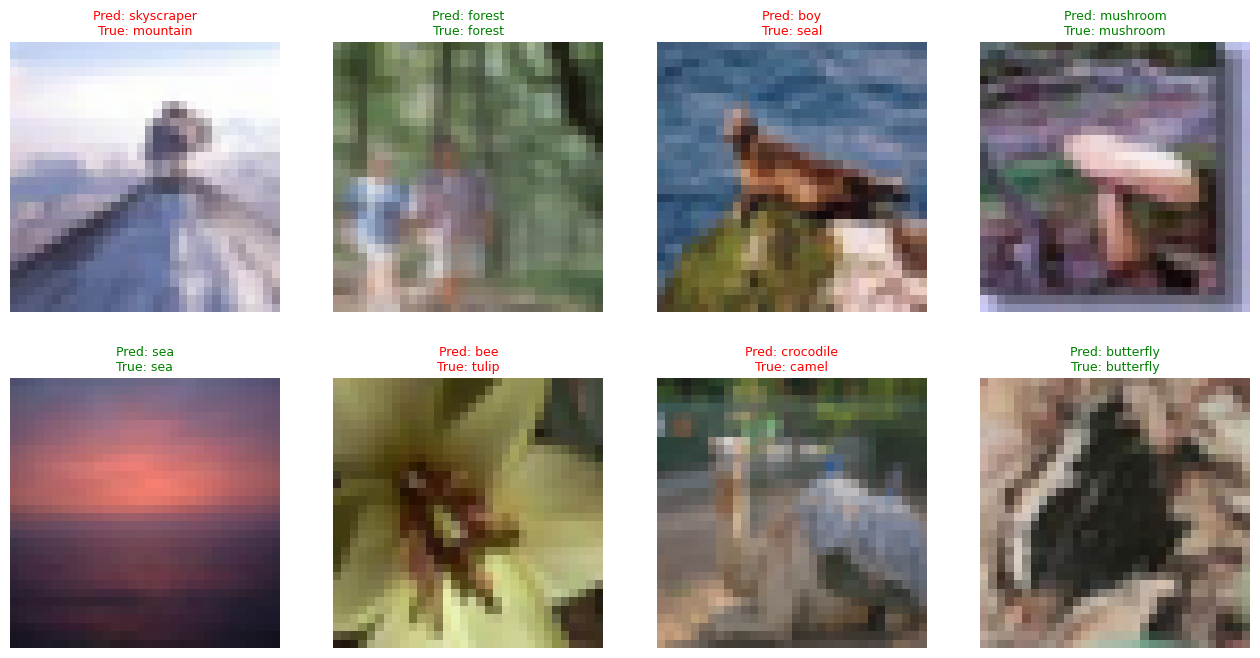

In [33]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy")
plt.legend()

plt.show()

classes = train_loader.dataset.classes

def imshow(img):
    img = img.cpu().numpy().transpose((1, 2, 0))
    mean = np.array((0.5071, 0.4865, 0.4409))
    std = np.array((0.2673, 0.2564, 0.2761))
    img = std * img + mean
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    plt.axis("off")

dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

model.eval()
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

plt.figure(figsize=(16,8))
for i in range(8):
    plt.subplot(2,4,i+1)
    imshow(images[i])
    plt.title(f"Pred: {classes[predicted[i]]}\nTrue: {classes[labels[i]]}",
              fontsize=9, color=("green" if predicted[i]==labels[i] else "red"))
plt.show()

In [34]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'densenet121', pretrained=False)

num_classes = 100
in_features = model.classifier.in_features
model.classifier = nn.Linear(in_features, num_classes)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [35]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

num_epochs = 10

for epoch in range(num_epochs):
    train_loss, train_accuracy = train(model, train_loader, criterion, optimizer, device)
    test_loss, test_accuracy = test(model, test_loader, criterion, device)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
          f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

Epoch 1/10, Train Loss: 4.7022, Train Accuracy: 0.94%, Test Loss: 4.6925, Test Accuracy: 1.04%


Epoch 2/10, Train Loss: 4.6997, Train Accuracy: 1.04%, Test Loss: 4.7002, Test Accuracy: 1.04%


Epoch 3/10, Train Loss: 4.7013, Train Accuracy: 0.88%, Test Loss: 4.7025, Test Accuracy: 1.06%


Epoch 4/10, Train Loss: 4.7018, Train Accuracy: 0.98%, Test Loss: 4.6994, Test Accuracy: 1.08%


Epoch 5/10, Train Loss: 4.7008, Train Accuracy: 0.92%, Test Loss: 4.7019, Test Accuracy: 1.00%


Epoch 6/10, Train Loss: 4.6999, Train Accuracy: 0.97%, Test Loss: 4.7030, Test Accuracy: 1.01%


Epoch 7/10, Train Loss: 4.7014, Train Accuracy: 0.93%, Test Loss: 4.7015, Test Accuracy: 1.09%


Epoch 8/10, Train Loss: 4.7030, Train Accuracy: 0.92%, Test Loss: 4.6993, Test Accuracy: 1.00%


Epoch 9/10, Train Loss: 4.7023, Train Accuracy: 0.92%, Test Loss: 4.7024, Test Accuracy: 1.05%


Epoch 10/10, Train Loss: 4.7003, Train Accuracy: 0.92%, Test Loss: 4.6997, Test Accuracy: 0.97%


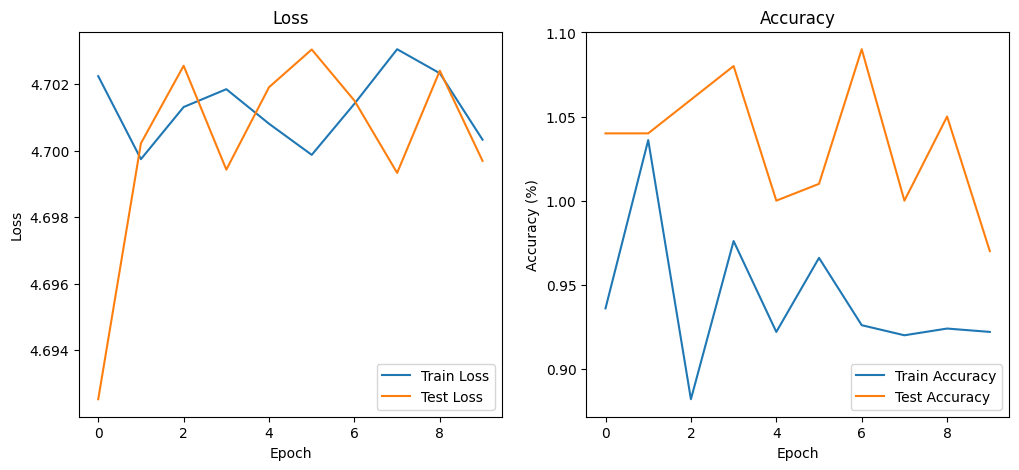

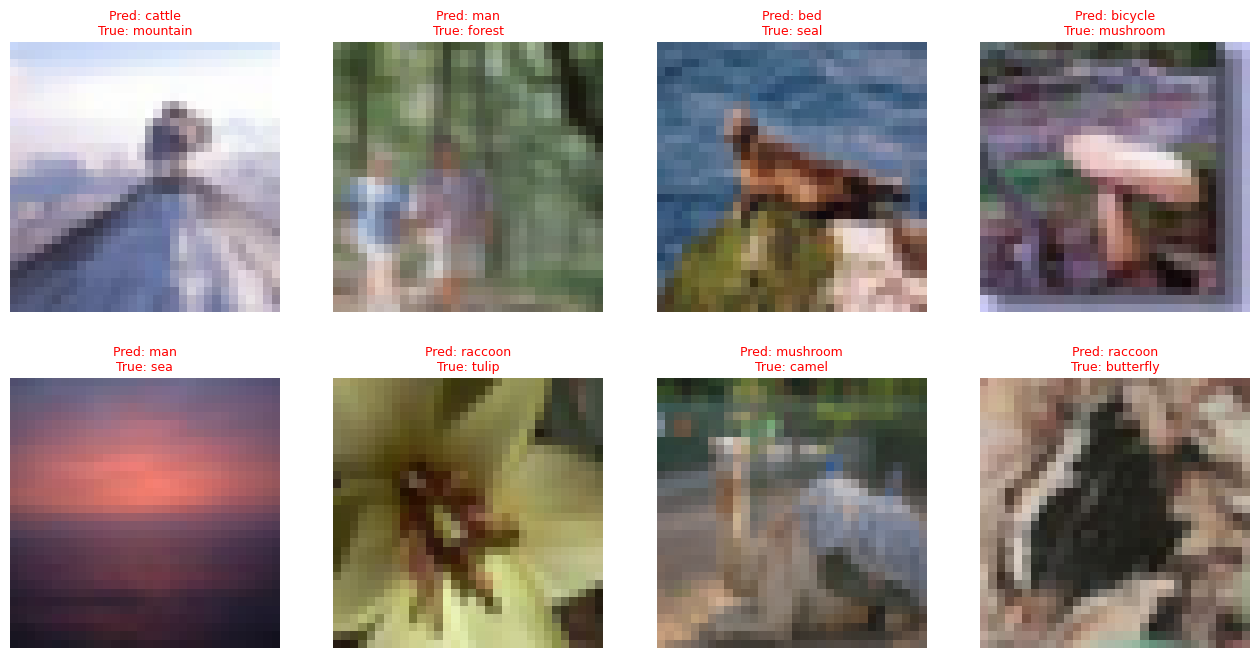

In [36]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy")
plt.legend()

plt.show()

classes = train_loader.dataset.classes

def imshow(img):
    img = img.cpu().numpy().transpose((1, 2, 0))
    mean = np.array((0.5071, 0.4865, 0.4409))
    std = np.array((0.2673, 0.2564, 0.2761))
    img = std * img + mean
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    plt.axis("off")

dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

model.eval()
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

plt.figure(figsize=(16,8))
for i in range(8):
    plt.subplot(2,4,i+1)
    imshow(images[i])
    plt.title(f"Pred: {classes[predicted[i]]}\nTrue: {classes[labels[i]]}",
              fontsize=9, color=("green" if predicted[i]==labels[i] else "red"))
plt.show()